<a href="https://colab.research.google.com/github/gosha-shapira/dog_breed_transfer_learning_notebook/blob/main/transfer_learning_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning Network
**Name Student 1:**
**ID Student 1:**<br><br>
**Name Student 2:**
**ID Student 2:**

### Import libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [ ]:
import pandas as pd
import os
import shutil

labels=pd.read_csv('/content/drive/MyDrive/Semester1_FinalProject/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
breeds=list(labels['breed'].unique())
len(breeds)

120

In [ ]:
## divide the train data into different folders according to their breed names
os.mkdir('/content/drive/MyDrive/Final_Project/new_train')

for i in range(len(labels)):
    if labels['breed'][i] not in os.listdir('/content/drive/MyDrive/Final_Project/new_train'):
      os.mkdir('/content/drive/MyDrive/Final_Project/new_train/'+labels['breed'][i])
    if (len(os.listdir('/content/drive/MyDrive/Final_Project/new_train/' + labels['breed'][i])) < 50):
      shutil.copy('/content/drive/MyDrive/Final_Project/train/'+labels['id'][i]+'.jpg', '/content/drive/MyDrive/Final_Project/new_train/' +labels['breed'][i])

In [ ]:
import random
import numpy as np

del list 

os.chdir('/content/drive/MyDrive/Final_Project/new_train')

# split data into train(80%), val(10%), test(10%)
for i in ['train','val','test']:
    os.mkdir('/content/drive/MyDrive/Final_Project/' + i)

for i in breeds:
    os.mkdir('/content/drive/MyDrive/Final_Project/train/'+ i)
    os.mkdir('/content/drive/MyDrive/Final_Project/val/'+ i)
    os.mkdir('/content/drive/MyDrive/Final_Project/test/'+ i)
    breed_i=os.listdir(i)
    a=list(range(len(breed_i)))
    np.random.shuffle(a)
    idx1=round(len(breed_i)*0.8)
    idx2=round(len(breed_i)*0.9)
    train=list(pd.Series(breed_i)[a[:idx1]])
    val=list(pd.Series(breed_i)[a[idx1:idx2]])
    test=list(pd.Series(breed_i)[a[idx2:]])
    for t in train:
        shutil.copy('/content/drive/MyDrive/Final_Project/new_train/' + i +'/'+t, '/content/drive/MyDrive/Final_Project/train/'+ i)
    for v in val:
        shutil.copy('/content/drive/MyDrive/Final_Project/new_train/' + i +'/'+v, '/content/drive/MyDrive/Final_Project/val/'+ i)
    for te in test:
        shutil.copy('/content/drive/MyDrive/Final_Project/new_train/' + i +'/'+te, '/content/drive/MyDrive/Final_Project/test/'+ i)


# Assistance functions 


In [ ]:
from keras.preprocessing import image                  
from tqdm import tqdm
import numpy as np

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split

# define function to load train, test, and validation datasets
def load_dataset(path):
    #Load text files with categories as subfolder names.
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 120)
    return dog_files, dog_targets

In [ ]:
def report_accuracy(test_tensors, test_targets):
    # get index of predicted dog breed for each image in test set
    dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

    # Find out the Number of Samples
    num_test_samples = len(dog_breed_predictions)

    print("The Number of Test images are: {}".format(num_test_samples))

    # report test accuracy
    test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
    print('Test accuracy: %.4f%%' % test_accuracy)

# Augmanted data


In [ ]:
# load train, test, and validation datasets
os.chdir('/content/drive/MyDrive/Final_Project')
train_files, train_targets = load_dataset('/content/drive/MyDrive/Final_Project/train')
val_files, val_targets = load_dataset('/content/drive/MyDrive/Final_Project/val')
test_files, test_targets = load_dataset('/content/drive/MyDrive/Final_Project/test')

# load list of dog breed names
breeds = [item[21:-1] for item in sorted(glob("/content/drive/MyDrive/Final_Project/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(breeds))
print('There are %s total dog images.\n' % len(np.hstack([train_files, val_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(val_files))
print('There are %d test dog images.'% len(test_files))

There are 120 total dog categories.
There are 6000 total dog images.

There are 4800 training dog images.
There are 600 validation dog images.
There are 600 test dog images.


In [ ]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras - Converts to (224, 224) and converts into a numpy array using PIL.
train_tensors = paths_to_tensor(train_files).astype('float32')/255
val_tensors = paths_to_tensor(val_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 600/600 [00:04<00:00, 132.44it/s]


# Visualization of the given data (the original data) before augmentation to new train set


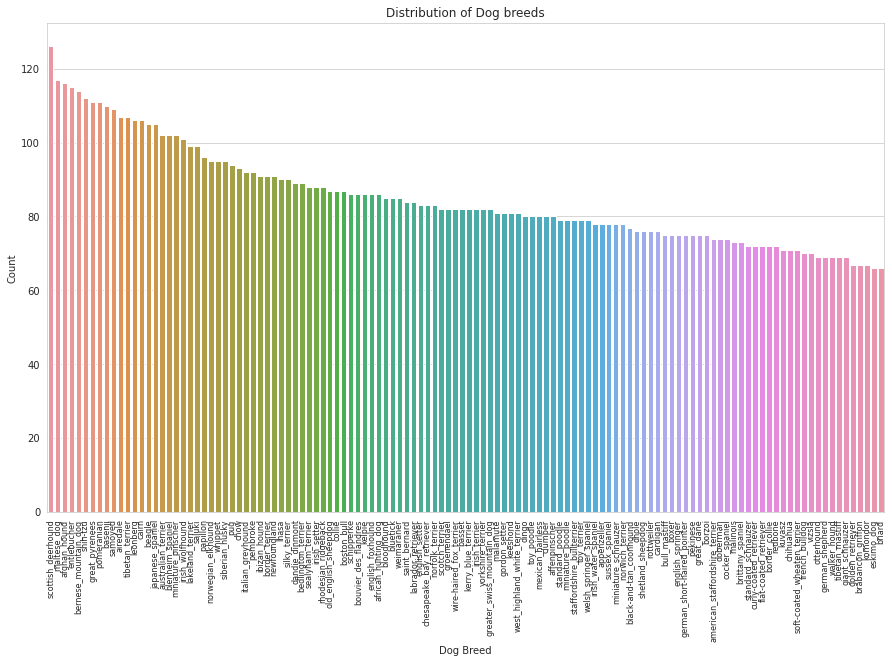

In [ ]:
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

yy = pd.value_counts(labels['breed'])

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.set_style("whitegrid")

ax = sns.barplot(x = yy.index, y = yy, data = labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of Dog breeds')
plt.show()

In [ ]:
yy.head()


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

### Building NN

### Training NN

### Visualization of Loss and Accuracy

### Making the predictions and evaluating the model

### Model Performance Evaluation

# Building the CNN

**small first try model**
build the model layer by layer using keras

In [67]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# dimensions of our images
img_width, img_height = 224, 224
train_data_dir = '/content/drive/MyDrive/Final_Project/train'
validation_data_dir = '/content/drive/MyDrive/Final_Project/val'
nb_train_samples = 4800
nb_validation_samples = 600
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(120))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 activation_15 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 activation_16 (Activation)  (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                 

### Training NN

In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing: only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('final_scratch.h5')

Found 4800 images belonging to 120 classes.
Found 600 images belonging to 120 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
300/300 [==============================] - 347s 1s/step - loss: 4.8102 - accuracy: 0.0050 - val_loss: 4.7873 - val_accuracy: 0.0101
Epoch 2/50
300/300 [==============================] - 332s 1s/step - loss: 4.7923 - accuracy: 0.0085 - val_loss: 4.7871 - val_accuracy: 0.0118
Epoch 3/50
182/300 [=================>............] - ETA: 2:03 - loss: 4.7910 - accuracy: 0.0086

model prediction

In [ ]:
model.load_weights('final_scratch.h5')

print('For training set:')
report_accuracy(train_tensors, train_targets)

print('For validation set:')
report_accuracy(val_tensors, val_targets)

print('For test set:')
report_accuracy(test_tensors, test_targets)

# Experiment number 1:

# Experiment number 2:

# Experiment number 3:

# Experiment number 4 (The Chosen architecture):